Drug Prescription Project by Aryaman Mishra

In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact


In [2]:
data=pd.read_csv(r'C:\Users\aryam\Desktop\ML\Drug Prescription/drugsComTrain_raw.csv')
data.shape

(161297, 7)

In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
print("Number of Unique Drugs present in the Dataset:",data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset:",data['drugName'].nunique())

print("\n The Time Period of Collecting the Data")
print("Starting Date:",data['date'].min())
print("Ending Date:",data['date'].max())

Number of Unique Drugs present in the Dataset: 3436
Number of Unique Medical Conditions present in the Dataset: 3436

 The Time Period of Collecting the Data
Starting Date: 1-Apr-08
Ending Date: 9-Sep-17


In [5]:
data[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [6]:
print("\nAnalysis on Useless Drugs")
print("The Number of Drugs with no Useful Counts: ",format(data[data['usefulCount']==0].count()[0]))


Analysis on Useless Drugs
The Number of Drugs with no Useful Counts:  6318


In [7]:
print("Number of Good Drugs with Lesser Useful Count:",data[(data['usefulCount']==0)& data['rating']>=8].count()[0])

Number of Good Drugs with Lesser Useful Count: 0


In [8]:
print("Average Rating of drugs with no useful count:",format(data[data['usefulCount']==0]['rating'].mean()))

Average Rating of drugs with no useful count: 5.799778410889522


In [9]:
print("\nAnalysis on Useless Drugs")
print("The Number of Drugs with greater than 1000 Useful Counts: ",format(data[data['usefulCount']>1000].count()[0]))


Analysis on Useless Drugs
The Number of Drugs with greater than 1000 Useful Counts:  4


In [10]:
print("Average Rating of drugs with more than 1000 useful count:",format(data[data['usefulCount']>1000]['rating'].mean()))

Average Rating of drugs with more than 1000 useful count: 10.0


In [11]:
print("Name and condition of these drugs:\n\n",data[data['usefulCount']>1000][['drugName','condition']].reset_index(drop=True))

Name and condition of these drugs:

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [12]:
data[['drugName','condition','review']].describe(include='object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [13]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


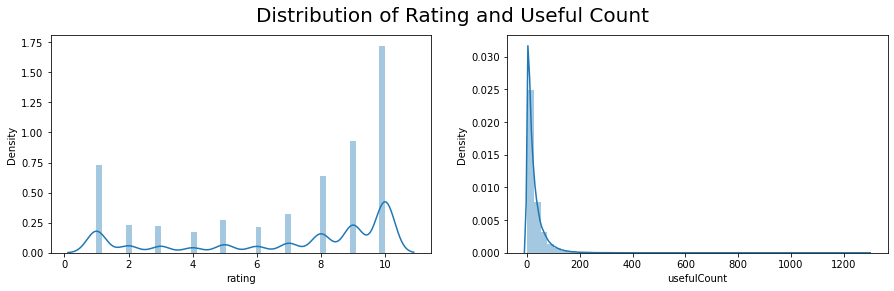

In [14]:
plt.rcParams['figure.figsize']=(15,4)
plt.subplot(1,2,1)
sns.distplot(data['rating'])
##sns.displot(data=data['rating'], x="rating")
plt.subplot(1,2,2)
sns.distplot(data['usefulCount'])
##sns.displot(data=usefulCount, x="usefulCount")
plt.suptitle('Distribution of Rating and Useful Count \n',fontsize=20)
plt.show()

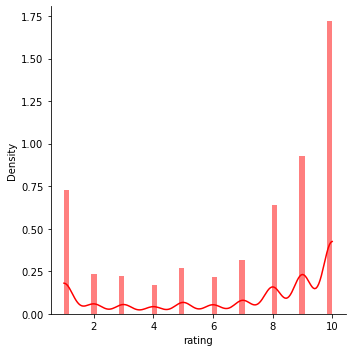

In [15]:
sns.displot(data['rating'], color="red", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='rating', ylabel='Density'>

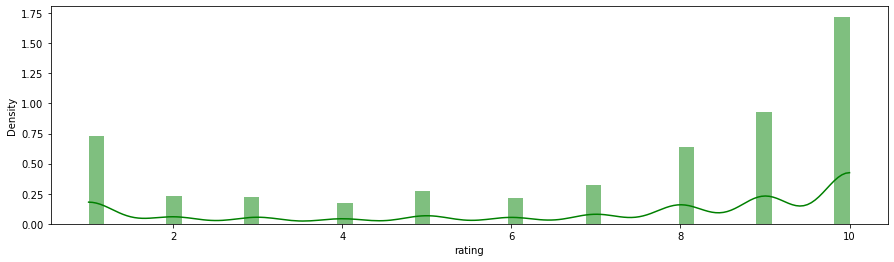

In [16]:
sns.histplot(data['rating'], color="green", kde=True, stat="density", linewidth=0)

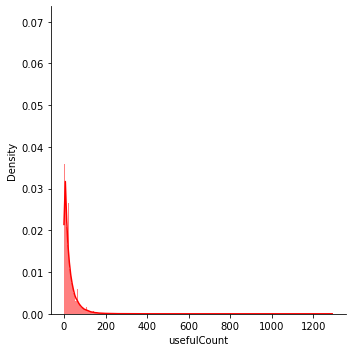

In [17]:
sns.displot(data['usefulCount'], color="red", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='usefulCount', ylabel='Density'>

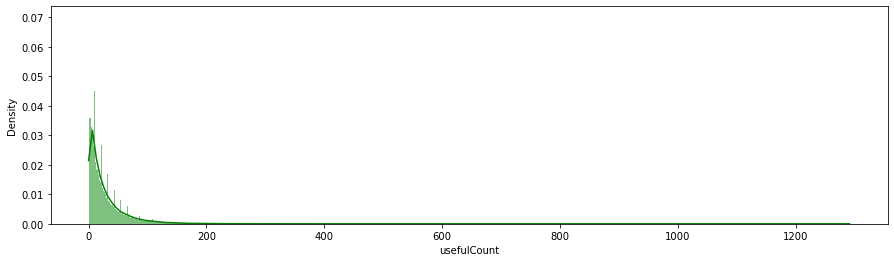

In [18]:
sns.histplot(data['usefulCount'], color="green", kde=True, stat="density", linewidth=0)

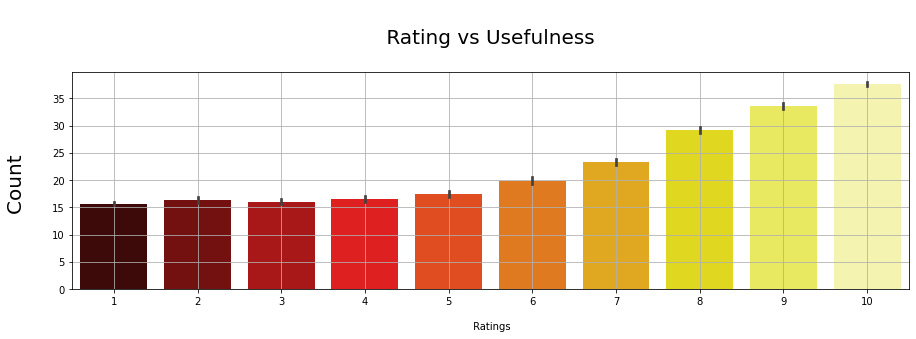

In [19]:
plt.rcParams['figure.figsize']=(15,4)
sns.barplot(x=data['rating'],y=data['usefulCount'],palette='hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count \n',fontsize=20)
plt.title('\n Rating vs Usefulness \n',fontsize=20)
plt.show()

In [20]:
data['len']=data['review'].apply(len)

In [21]:
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.877330   3692
2        9  453.238205  10787
3        8  461.124367   5112
4        7  463.878292   3030
5        6  477.860851   2048
6        4  468.150717   2202
7        6  485.600465   3063
8        3  483.233510   4087
9        3  477.477898   6182
10       3  442.947891   6192

In [22]:
print("Length of Longest Review",data['len'].max())
data['review'][data['len']==data['len'].max()].iloc[0]

Length of Longest Review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

In [23]:
def punctuation_removal(messy_str):
    clean_list=[char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review']=data['review'].apply(punctuation_removal)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop=stopwords.words('english')
stop.append("i'm")
stop_words=[]

for item in stop:
    new_item=punctuation_removal(item)
    stop_words.append(new_item)
    
def stopwords_removal(messy_str):
    messy_str=word_tokenize(messy_str)
    return [word.lower() for word in messy_str
           if word.lower() not in stop_words]

data['review']=data['review'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
def drop_numbers(list_text):
    list_text_new=[]
    for i in list_text:
        if not re.search('\d',i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review']=data['review'].apply(drop_numbers)

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

train_sentiments=[]
for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments=np.asarray(train_sentiments)
data['sentiment']=pd.Series(data=train_sentiments)

In [ ]:
data[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

In [ ]:
data=data.drop(['date','uniqueID','sentiment','review','len'],axis=1)
data.columns

In [ ]:
min_rating=data['rating'].min()
max_rating=data['rating'].max()
def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating=rating*5
    rating=int(round(rating,0))
    if(int(rating)==0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    
data['eff_score']=data['rating'].apply(scale_rating)    

In [ ]:
data['usefulness']=data['rating']*data['usefulCount']*data['eff_score']
data[['drugName','condition','usefulness']][data['usefulness']>data['usefulness'].mean()].sort_values(by='usefulness',ascending=False).head(10).reset_index(drop=True)

In [ ]:
@interact
def check(condition=list(data['condition'].value_counts().index)):
    return data[data['condition']==condition]['eff_score'].value_counts()

In [ ]:
popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorder','Insomnia','Obesity','ADHD','High Blood Pressure')
conditions=data.loc[data['condition'].isin(popular_conditions)]
sns.barplot(x=conditions['condition'],y=conditions['rating'],hue=data['eff_score'],palette='autumn')
plt.title('Conditions v/s Effective Number of Drugs')
plt.xticks(rotation=45)
plt.ylabel(' ')
plt.show()

In [ ]:
print("Number of Uniue Conditions:",data['condition'].nunique())
data['condition'].value_counts().head(10)

In [ ]:
data[['drugName','usefulCount']][data['usefulCount']>data['usefulCount'].mean()].sort_values(by='usefulCount',ascending=False).head(10).reset_index(drop=True)

In [ ]:
data=data.drop_duplicates()

In [ ]:
@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 drugs")
    print(data[data['condition']==condition][['drugName','usefulness']].sort_values(by='usefulness',ascending=False).head().reset_index(drop=True))
    print("\n Bottom 5 drugs")
    print(data[data['condition']==condition][['drugName','usefulness']].sort_values(by='usefulness',ascending=True).head().reset_index(drop=True))